## Aprendizado Não Supervisionado - Agrupamento de Dados
#### Prof. Thomas da Silva Paula

### Hierarchical Agglomerative Clustering - Demo 3

* Exemplo de agrupamento hierárquico em base de dados real
* Base de dados do FIFA19 - https://www.kaggle.com/karangadiya/fifa19

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram

%matplotlib inline

pd.set_option('display.max_columns', None)
sns.set()

## Carregar base de dados

In [2]:
df_all = pd.read_csv('../datasets/fifa19/data.csv', index_col=0)
df_all.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
print(len(df_all))

18207


In [4]:
df_all.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

### Remover algumas colunas
Vamos remover algumas colunas que não gostaríamos de contar na nossa análise. Queremos utilizar apenas variáveis relacionadas às habilidades dos jogadores.

In [5]:
columns_to_drop = ['ID','Age', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Preferred Foot', 'Value', 'Wage', 'Body Type',
                   'Real Face','Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
                   'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM',
                   'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
                   'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause']
df_all.drop(columns=columns_to_drop, inplace=True)

In [6]:
df_all.head()

,Name,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,94,94,2202,5.0,4.0,4.0,Medium/ Medium,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,94,94,2228,5.0,4.0,5.0,High/ Low,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,92,93,2143,5.0,5.0,5.0,High/ Medium,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,91,93,1471,4.0,3.0,1.0,Medium/ Medium,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,91,92,2281,4.0,5.0,4.0,High/ High,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


Remover colunas com valores nulos

In [7]:
df_all.isna().sum()

Name                         0
Overall                      0
Potential                    0
Special                      0
International Reputation    48
Weak Foot                   48
Skill Moves                 48
Work Rate                   48
Height                      48
Weight                      48
Crossing                    48
Finishing                   48
HeadingAccuracy             48
ShortPassing                48
Volleys                     48
Dribbling                   48
Curve                       48
FKAccuracy                  48
LongPassing                 48
BallControl                 48
Acceleration                48
SprintSpeed                 48
Agility                     48
Reactions                   48
Balance                     48
ShotPower                   48
Jumping                     48
Stamina                     48
Strength                    48
LongShots                   48
Aggression                  48
Interceptions               48
Position

In [9]:
df_all.dropna(inplace=True)
print(len(df_all))

18159


### Removendo algumas instâncias
Iremos aplicar algoritmos de clustering hierárquico num subset dos dados

In [10]:
keep = 1000
df = df_all.iloc[:keep].copy()
df

,Name,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,94,94,2202,5.0,4.0,4.0,Medium/ Medium,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,94,94,2228,5.0,4.0,5.0,High/ Low,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,92,93,2143,5.0,5.0,5.0,High/ Medium,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,91,93,1471,4.0,3.0,1.0,Medium/ Medium,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,91,92,2281,4.0,5.0,4.0,High/ High,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,B. Bourigeaud,77,81,2049,1.0,3.0,4.0,High/ High,5'10,150lbs,78.0,70.0,53.0,79.0,63.0,75.0,75.0,78.0,75.0,77.0,73.0,70.0,70.0,78.0,69.0,77.0,71.0,77.0,65.0,76.0,72.0,71.0,74.0,76.0,76.0,76.0,38.0,68.0,63.0,14.0,7.0,15.0,11.0,15.0
996,R. Soriano,77,77,2082,2.0,4.0,4.0,Medium/ Medium,6'0,168lbs,77.0,72.0,65.0,78.0,73.0,78.0,78.0,56.0,77.0,79.0,75.0,75.0,79.0,73.0,72.0,77.0,66.0,65.0,69.0,77.0,74.0,69.0,74.0,78.0,62.0,75.0,67.0,69.0,67.0,15.0,10.0,9.0,14.0,13.0
997,D. Kuzyaev,77,80,2041,1.0,3.0,3.0,Medium/ High,6'0,163lbs,67.0,64.0,51.0,82.0,57.0,78.0,60.0,61.0,75.0,79.0,78.0,81.0,80.0,73.0,76.0,76.0,60.0,79.0,59.0,74.0,70.0,74.0,71.0,70.0,63.0,64.0,71.0,77.0,76.0,15.0,16.0,13.0,7.0,8.0
998,R. Sambueza,77,77,2005,1.0,3.0,4.0,High/ Medium,5'9,159lbs,78.0,70.0,57.0,79.0,61.0,77.0,82.0,77.0,78.0,80.0,69.0,71.0,69.0,75.0,73.0,75.0,67.0,79.0,75.0,72.0,86.0,60.0,68.0,80.0,73.0,83.0,33.0,48.0,46.0,8.0,6.0,8.0,9.0,16.0


### Inspecionando algumas variáveis

Overall

<AxesSubplot:>

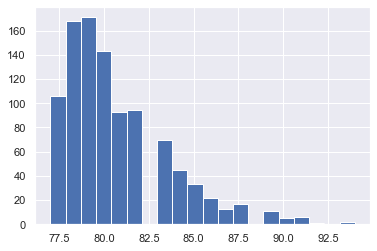

In [11]:
df['Overall'].hist(bins=20)

Special

<AxesSubplot:>

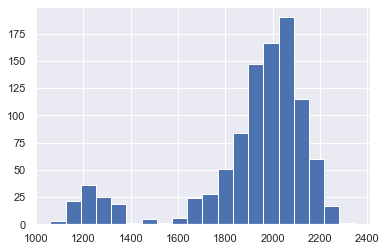

In [12]:
df['Special'].hist(bins=20)

Height

In [13]:
df['Height'].unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7"], dtype=object)

Weight

In [14]:
df['Weight'].unique()

array(['159lbs', '183lbs', '150lbs', '168lbs', '154lbs', '163lbs',
       '146lbs', '190lbs', '181lbs', '192lbs', '176lbs', '172lbs',
       '148lbs', '165lbs', '196lbs', '161lbs', '187lbs', '212lbs',
       '170lbs', '203lbs', '157lbs', '185lbs', '130lbs', '174lbs',
       '207lbs', '134lbs', '141lbs', '152lbs', '179lbs', '132lbs',
       '201lbs', '198lbs', '209lbs', '214lbs', '143lbs', '205lbs',
       '137lbs', '194lbs', '216lbs', '139lbs', '220lbs'], dtype=object)

### Préprocessamento dos dados

#### Conversões
Vamos converter a altura para centímetros e o peso para kilogramas

##### Altura

In [15]:
def feet_to_cm(h_feet_inches):
    feet, inches = h_feet_inches.split('\'')
    total_inches = int(inches) + int(feet) * 12
    total_cm = round(total_inches * 2.54, 1)
    return total_cm

In [16]:
df['Height'] = df['Height'].apply(feet_to_cm)
df['Height'].unique()

array([170.2, 188. , 175.3, 193. , 180.3, 172.7, 182.9, 167.6, 177.8,
       198.1, 185.4, 162.6, 190.5, 165.1, 195.6, 200.7])

##### Peso

In [17]:
def lbs_to_kg(w_lbs):
    lbs = int(w_lbs[:w_lbs.index('lbs')])
    kg = round(lbs / 2.205, 2)
    return kg

In [18]:
df['Weight'] = df['Weight'].apply(lbs_to_kg)
df['Weight'].unique()

array([72.11, 82.99, 68.03, 76.19, 69.84, 73.92, 66.21, 86.17, 82.09,
       87.07, 79.82, 78.  , 67.12, 74.83, 88.89, 73.02, 84.81, 96.15,
       77.1 , 92.06, 71.2 , 83.9 , 58.96, 78.91, 93.88, 60.77, 63.95,
       68.93, 81.18, 59.86, 91.16, 89.8 , 94.78, 97.05, 64.85, 92.97,
       62.13, 87.98, 97.96, 63.04, 99.77])

##### Work Rate

In [19]:
df['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium'],
      dtype=object)

In [20]:
df = pd.concat([df, pd.get_dummies(df['Work Rate'], prefix='work_rate')], axis=1)
df.drop(['Work Rate'], axis=1, inplace=True)

In [21]:
df.head()

,Name,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,work_rate_High/ High,work_rate_High/ Low,work_rate_High/ Medium,work_rate_Low/ High,work_rate_Low/ Medium,work_rate_Medium/ High,work_rate_Medium/ Low,work_rate_Medium/ Medium
0,L. Messi,94,94,2202,5.0,4.0,4.0,170.2,72.11,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,0,0,0,0,0,0,0,1
1,Cristiano Ronaldo,94,94,2228,5.0,4.0,5.0,188.0,82.99,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,0,1,0,0,0,0,0,0
2,Neymar Jr,92,93,2143,5.0,5.0,5.0,175.3,68.03,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,0,0,1,0,0,0,0,0
3,De Gea,91,93,1471,4.0,3.0,1.0,193.0,76.19,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,0,0,0,0,0,0,0,1
4,K. De Bruyne,91,92,2281,4.0,5.0,4.0,180.3,69.84,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1,0,0,0,0,0,0,0


#### Normalizações

In [22]:
columns_to_normalize = ['Overall', 'Potential', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves',
                        'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                        'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                        'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                        'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                        'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                        'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                        'GKKicking', 'GKPositioning', 'GKReflexes']

for column in columns_to_normalize:
    df[column] = (df[column] - df[column].mean()) / df[column].std()
    
df.head()

,Name,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,work_rate_High/ High,work_rate_High/ Low,work_rate_High/ Medium,work_rate_Low/ High,work_rate_Low/ Medium,work_rate_Medium/ High,work_rate_Medium/ Low,work_rate_Medium/ Medium
0,L. Messi,4.402529,3.064417,1.123547,3.296119,0.972330,0.962145,-1.721765,-0.685252,1.027532,1.641560,0.425806,1.153962,1.345499,1.351834,1.432573,1.805681,1.327650,1.277008,1.497121,1.192122,1.495195,3.711059,1.854901,0.870090,-0.187271,0.004837,-1.062024,1.491086,-1.027552,-1.496412,1.352589,1.848144,0.881545,2.550820,-1.029058,-1.107375,-1.044685,-0.547047,-0.321699,-0.121123,-0.179100,-0.451669,0,0,0,0,0,0,0,1
1,Cristiano Ronaldo,4.402529,3.064417,1.222547,3.296119,0.972330,1.925253,0.872198,0.803231,1.027532,1.596891,1.346417,0.555986,1.392032,0.922953,0.878511,0.952447,0.674343,1.169543,1.355937,1.561589,1.208264,3.932179,0.173458,1.415670,2.139609,1.050609,0.704924,1.444965,-0.186537,-1.201062,1.396111,0.964675,1.432993,2.429219,-1.245328,-0.990052,-1.160589,-0.502240,-0.321699,-0.121123,-0.179100,-0.319987,0,1,0,0,0,0,0,0
2,Neymar Jr,3.744207,2.797783,0.898894,3.296119,2.307949,1.925253,-0.978551,-1.243434,0.788992,1.284204,0.038181,0.755311,1.252433,1.304180,1.201714,1.473868,0.739674,1.223276,1.708898,1.487695,1.853858,3.489939,1.115066,0.597300,-0.790536,0.593084,-1.945498,0.937636,-0.579011,-0.905712,1.134977,1.332787,1.212414,2.307618,-1.288582,-1.263806,-0.774241,-0.412626,-0.414769,-0.121123,-0.133608,-0.319987,0,0,1,0,0,0,0,0
3,De Gea,3.415046,2.797783,-1.659876,2.142420,-0.363288,-1.927180,1.600840,-0.127071,-2.168894,-2.021341,-1.948399,-1.503712,-2.051403,-2.412791,-1.891797,-1.749462,-1.024254,-1.624551,-0.903017,-0.876893,-0.728516,2.605458,-1.642501,-2.076039,-0.273451,-1.890626,-0.620287,-2.290821,-1.588229,-1.158869,-2.216247,-0.066039,-1.048523,-0.854002,-1.807631,-1.381130,-1.546937,3.216730,3.121916,3.447162,3.187263,3.323214,0,0,0,0,0,0,0,1
4,K. De Bruyne,3.415046,2.531150,1.424355,2.142420,2.307949,0.962145,-0.249909,-0.995809,1.456902,1.060856,-0.300991,1.286846,1.159367,0.827646,1.063198,1.284260,1.588972,1.008345,0.579421,0.453188,0.634403,2.826578,0.644262,1.197438,-0.618174,1.181331,0.351534,1.352723,0.542343,0.149110,1.047932,1.848144,1.102124,1.578014,0.484835,0.065857,-0.078815,-0.143785,-0.228628,-0.616719,-0.361065,-0.232199,1,0,0,0,0,0,0,0


### Aplicando agrupamento hierárquico e explorando resultados

In [23]:
sns.set(style='darkgrid', context='notebook', rc={'figure.figsize': (20, 20)})

In [29]:
def do_clustering(data, method='single', metric='euclidean', threshold=2.0):
    # Copiamos os dados e removemos a coluna do nome do jogador
    data_copy = data.copy()
    data_copy.drop(columns='Name', inplace=True)
    
    linkage_matrix = linkage(data_copy, method=method, metric=metric)
    d = dendrogram(linkage_matrix, orientation='right', truncate_mode='lastp')
    plt.axvline(x=threshold, color='black', linewidth=3)
    labels = fcluster(linkage_matrix, threshold, 'distance')
    
    data_copy['cluster_labels'] = labels
    data_copy['player_name'] = data['Name']
    
    return data_copy[['player_name', 'cluster_labels']]

In [25]:
def print_clusters(data, clusters, max_players=10):
    for c in clusters:
        print('Cluster: ', c)
        print(list(data[data['cluster_labels'] == c]['player_name'][:max_players]))
        print()
        print()

### Experimento 1

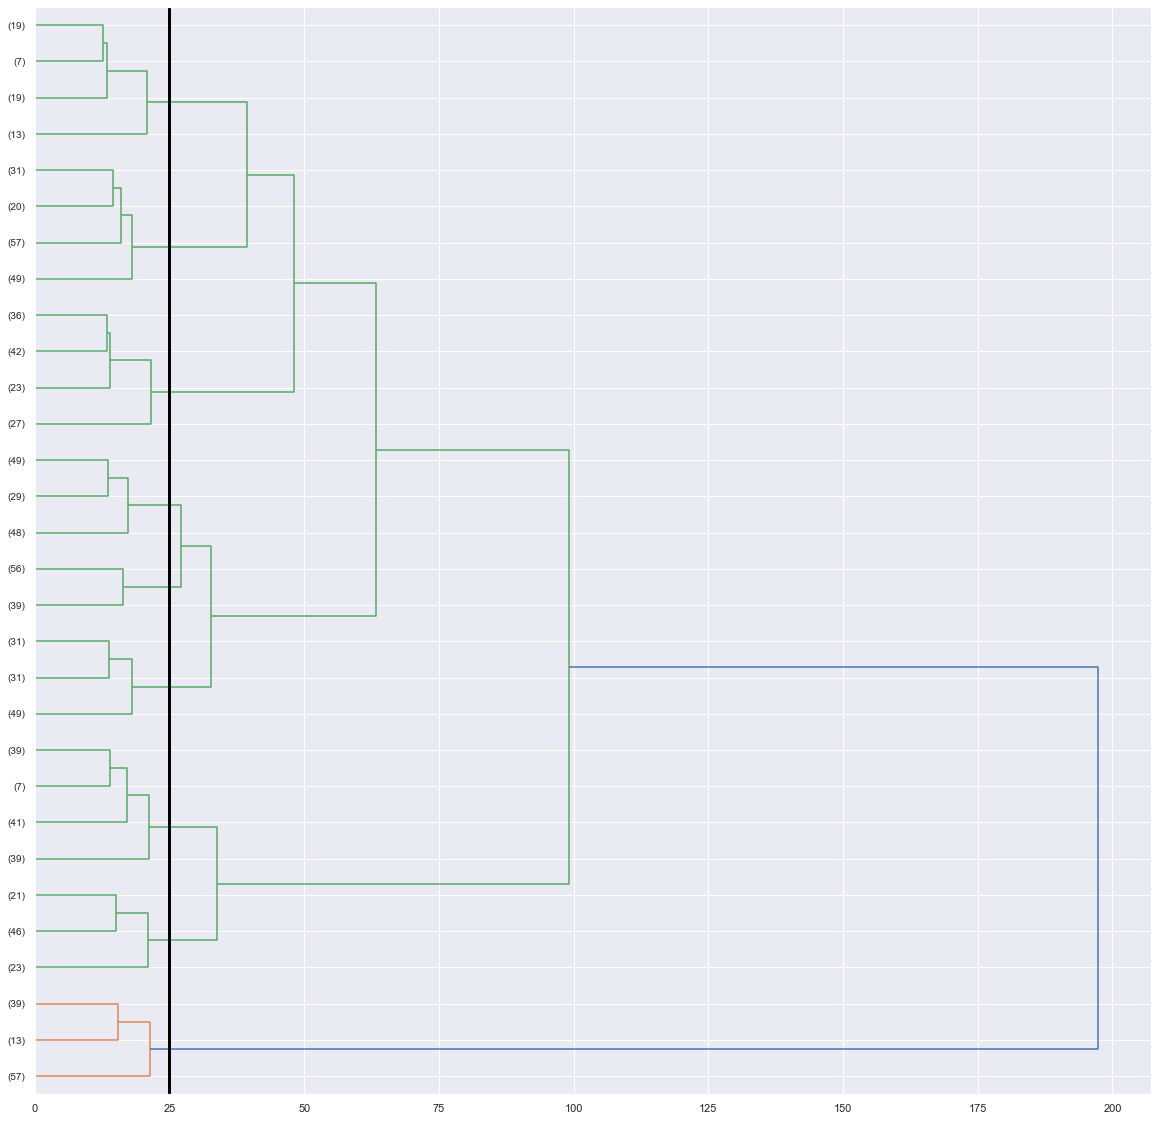

In [30]:
df_copy = do_clustering(df, method='ward', metric='euclidean', threshold=25.0)

In [31]:
clusters = df_copy['cluster_labels'].unique()
print('Número de clusters:', len(clusters))
print('Clusters:', clusters)

Número de clusters: 9
Clusters: [9 1 2 3 4 7 8 6 5]


In [32]:
print_clusters(df_copy, clusters, max_players=15)

Cluster:  9
['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'K. De Bruyne', 'E. Hazard', 'L. Modrić', 'L. Suárez', 'R. Lewandowski', 'T. Kroos', 'David Silva', 'P. Dybala', 'H. Kane', 'A. Griezmann', 'E. Cavani', 'S. Agüero']


Cluster:  1
['De Gea', 'J. Oblak', 'M. ter Stegen', 'T. Courtois', 'M. Neuer', 'H. Lloris', 'S. Handanovič', 'G. Buffon', 'K. Navas', 'Ederson', 'Alisson', 'W. Szczęsny', 'A. Lopes', 'M. Perin', 'B. Leno']


Cluster:  2
['Sergio Ramos', 'Sergio Busquets', 'Casemiro', 'M. Hummels', 'Thiago Silva', 'S. Umtiti', 'J. Vertonghen', 'Piqué', 'V. van Dijk', 'L. Bonucci', 'T. Alderweireld', 'J. Boateng', 'S. Khedira', 'Naldo', 'A. Laporte']


Cluster:  3
['D. Godín', 'G. Chiellini', 'K. Koulibaly', 'R. Varane', 'M. Benatia', 'M. Škriniar', 'K. Manolas', 'N. Otamendi', 'Miranda', 'V. Kompany', 'Pepe', 'D. Sánchez', 'J. Giménez', 'N. Süle', 'Marquinhos']


Cluster:  4
['N. Kanté', 'Marcelo', 'P. Pogba', 'Jordi Alba', 'M. Hamšík', 'I. Rakitić', 'M. Verratti', 'Alex Sandro', 

### Experimento 2

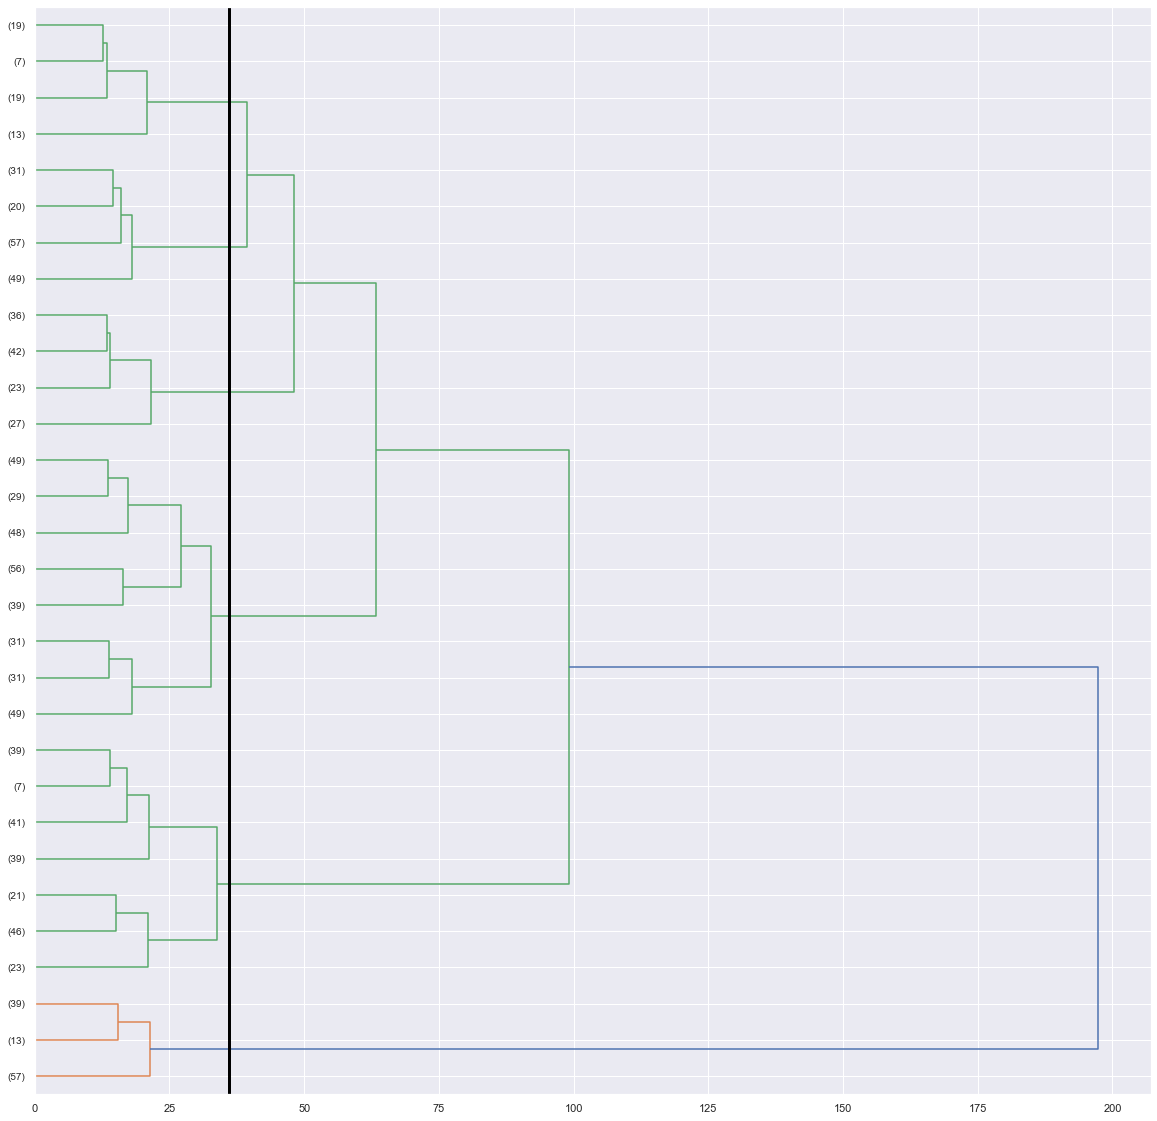

In [33]:
df_copy = do_clustering(df, method='ward', metric='euclidean', threshold=36.0)

In [34]:
clusters = df_copy['cluster_labels'].unique()
print('Número de clusters:', len(clusters))
print('Clusters:', clusters)

Número de clusters: 6
Clusters: [6 1 2 3 4 5]


In [36]:
print_clusters(df_copy, clusters, max_players=100)

Cluster:  6
['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'K. De Bruyne', 'E. Hazard', 'L. Modrić', 'L. Suárez', 'R. Lewandowski', 'T. Kroos', 'David Silva', 'P. Dybala', 'H. Kane', 'A. Griezmann', 'E. Cavani', 'S. Agüero', 'K. Mbappé', 'M. Salah', 'J. Rodríguez', 'L. Insigne', 'Isco', 'C. Eriksen', 'Coutinho', 'P. Aubameyang', 'G. Bale', 'G. Higuaín', 'R. Lukaku', 'C. Immobile', 'D. Mertens', 'L. Sané', 'Bernardo Silva', 'S. Mané', 'R. Sterling', 'Roberto Firmino', 'Douglas Costa', 'T. Müller', 'M. Reus', 'M. Özil', 'Marco Asensio', 'N. Fekir', 'A. Lacazette', 'A. Sánchez', 'Y. Brahimi', 'I. Perišić', 'E. Džeko', 'Diego Costa', 'Z. Ibrahimović', 'A. Martial', 'M. Depay', 'M. Mandžukić', 'A. Gómez', 'A. Robben', 'O. Dembélé', 'Gabriel Jesus', 'H. Ziyech', 'J. Draxler', 'Gelson Martins', 'F. Bernardeschi', 'Aduriz']


Cluster:  1
['De Gea', 'J. Oblak', 'M. ter Stegen', 'T. Courtois', 'M. Neuer', 'H. Lloris', 'S. Handanovič', 'G. Buffon', 'K. Navas', 'Ederson', 'Alisson', 'W. Szczęsny',

### Experimento 3

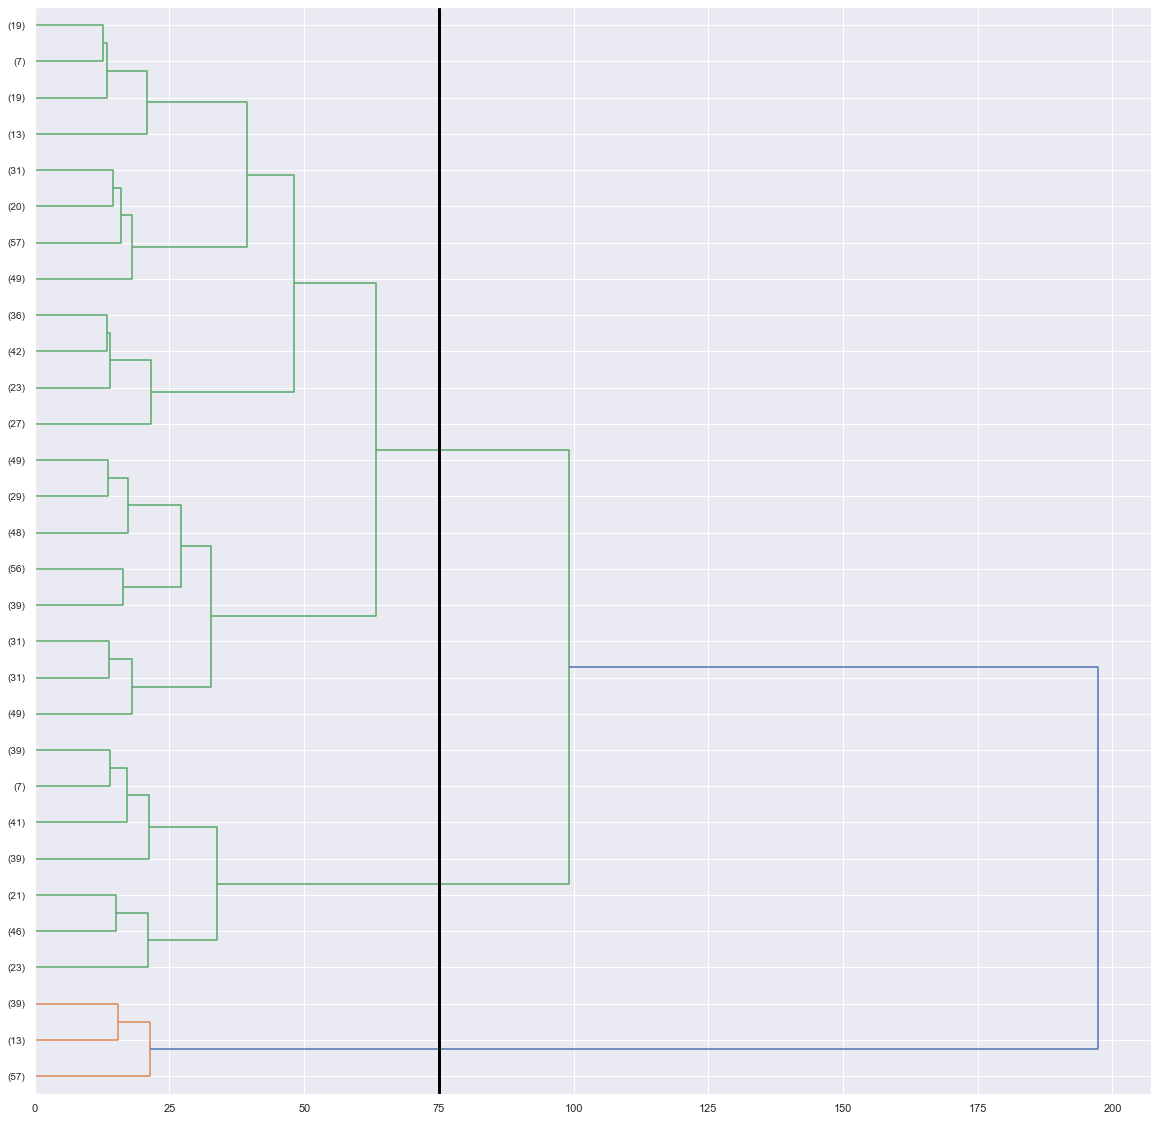

In [37]:
df_copy = do_clustering(df, method='ward', metric='euclidean', threshold=75.0)

In [38]:
clusters = df_copy['cluster_labels'].unique()
print('Número de clusters:', len(clusters))
print('Clusters:', clusters)

Número de clusters: 3
Clusters: [3 1 2]


In [39]:
print_clusters(df_copy, clusters, max_players=15)

Cluster:  3
['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'K. De Bruyne', 'E. Hazard', 'L. Modrić', 'L. Suárez', 'R. Lewandowski', 'T. Kroos', 'David Silva', 'N. Kanté', 'P. Dybala', 'H. Kane', 'A. Griezmann', 'E. Cavani']


Cluster:  1
['De Gea', 'J. Oblak', 'M. ter Stegen', 'T. Courtois', 'M. Neuer', 'H. Lloris', 'S. Handanovič', 'G. Buffon', 'K. Navas', 'Ederson', 'Alisson', 'W. Szczęsny', 'A. Lopes', 'M. Perin', 'B. Leno']


Cluster:  2
['Sergio Ramos', 'D. Godín', 'Sergio Busquets', 'G. Chiellini', 'Casemiro', 'M. Hummels', 'Thiago Silva', 'S. Umtiti', 'K. Koulibaly', 'J. Vertonghen', 'Piqué', 'V. van Dijk', 'R. Varane', 'L. Bonucci', 'T. Alderweireld']




### Experimento 4

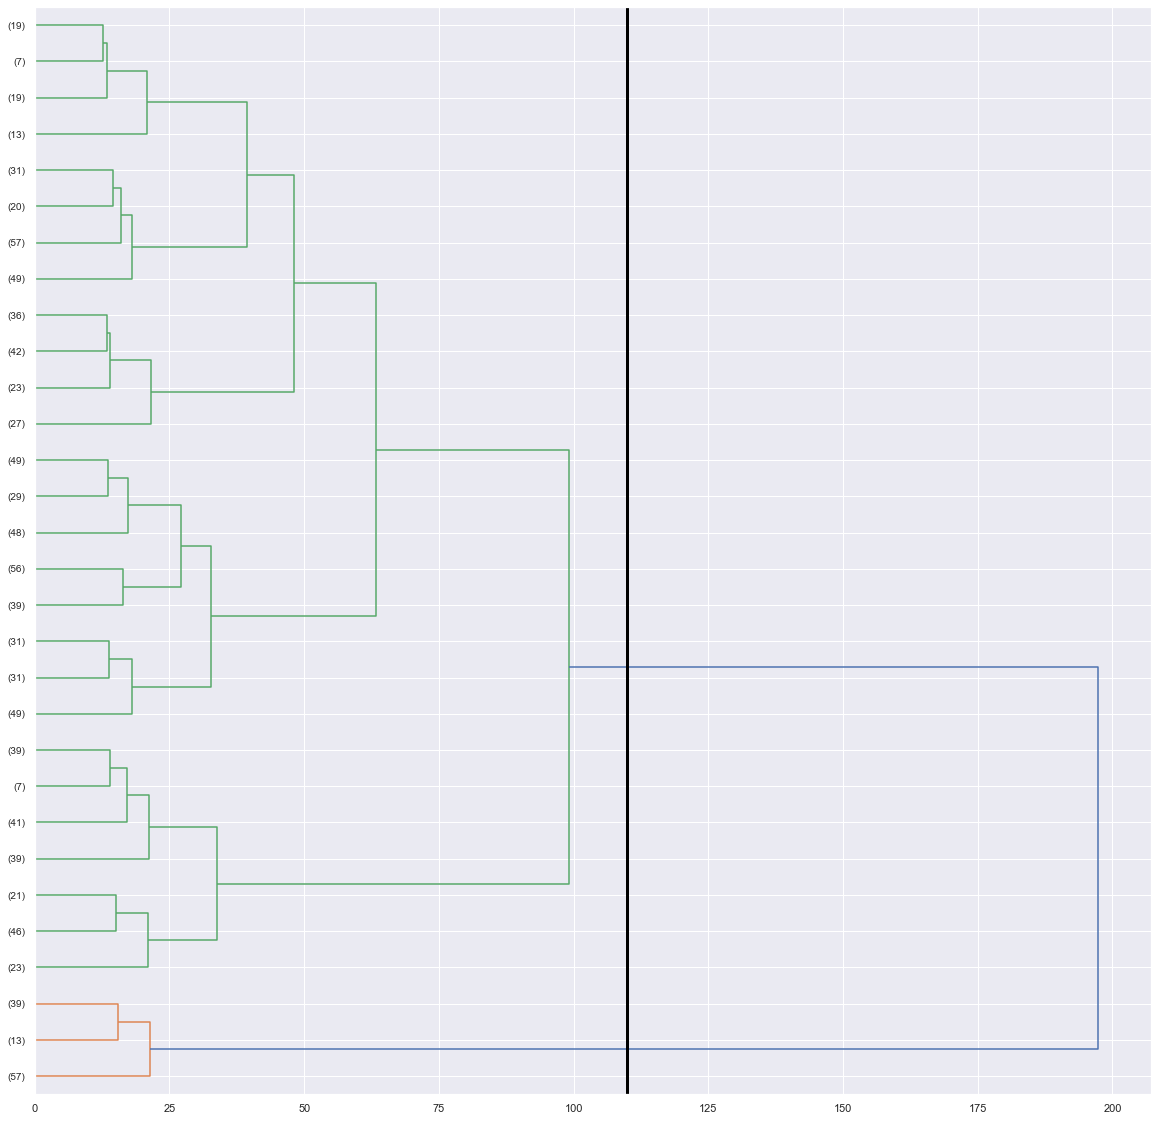

In [40]:
df_copy = do_clustering(df, method='ward', metric='euclidean', threshold=110.0)

In [41]:
clusters = df_copy['cluster_labels'].unique()
print('Número de clusters:', len(clusters))
print('Clusters:', clusters)

Número de clusters: 2
Clusters: [2 1]


In [42]:
print_clusters(df_copy, clusters, max_players=40)

Cluster:  2
['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'K. De Bruyne', 'E. Hazard', 'L. Modrić', 'L. Suárez', 'Sergio Ramos', 'R. Lewandowski', 'T. Kroos', 'D. Godín', 'David Silva', 'N. Kanté', 'P. Dybala', 'H. Kane', 'A. Griezmann', 'Sergio Busquets', 'E. Cavani', 'S. Agüero', 'G. Chiellini', 'K. Mbappé', 'M. Salah', 'Casemiro', 'J. Rodríguez', 'L. Insigne', 'Isco', 'C. Eriksen', 'Coutinho', 'P. Aubameyang', 'M. Hummels', 'Marcelo', 'G. Bale', 'G. Higuaín', 'Thiago Silva', 'S. Umtiti', 'M. Icardi', 'K. Koulibaly', 'P. Pogba', 'R. Lukaku', 'C. Immobile']


Cluster:  1
['De Gea', 'J. Oblak', 'M. ter Stegen', 'T. Courtois', 'M. Neuer', 'H. Lloris', 'S. Handanovič', 'G. Buffon', 'K. Navas', 'Ederson', 'Alisson', 'W. Szczęsny', 'A. Lopes', 'M. Perin', 'B. Leno', 'L. Hrádecký', 'Sergio Asenjo', 'S. Ruffier', 'K. Schmeichel', 'Kepa', 'J. Pickford', 'T. Horn', 'Neto', 'O. Baumann', 'D. Subašić', 'R. Fährmann', 'Adán', 'Rui Patrício', 'Y. Sommer', 'S. Mandanda', 'R. Jarstein', 'Pepe Reina